<a href="https://colab.research.google.com/github/David6230/Proyeccion_ventas/blob/main/proyecto_proyeccion_ventas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto de proyección de ventas

In [1]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:450px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

In [2]:
import pandas as pd
file_name = "/content/drive/MyDrive/CODIN DOJO/sales_predictions.csv"
df_ventas = pd.read_csv(file_name)
df_ventas.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# ¿Cuántas filas y columnas?

In [3]:
a_1 = pd.DataFrame(df_ventas.shape)


print(f"La base cuenta con {a_1[0][0]} filas y {a_1[0][1]} columnas.")

La base cuenta con 8523 filas y 12 columnas.


# ¿Cuáles son los tipos de datos en cada variable?

In [4]:
df_ventas.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

* Los tipos de datos con los que cuenta la base de datos son **object** y **float64**.


In [5]:
df_ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Análisis de datos duplicados

* Para realizar el análisis de registros duplicativos tomaremos la variable "Item_Identifier", como identificador único para determinar los registros duplicados.

In [6]:
# Procedo a realizar un testeo de un registro duplicado
#Genero una copia de mi base para no trabajar en la original

b_1 = df_ventas.copy()

In [7]:
b_1["dup"] = b_1["Item_Identifier"].duplicated()
a_1 = b_1[b_1["dup"] == True]
a_2 = b_1[b_1["Item_Identifier"] == "FDP49"]
a_2.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,dup
15,FDP49,9.0,Regular,0.069089,Breakfast,56.3614,OUT046,1997,Small,Tier 1,Supermarket Type1,1547.3192,False
17,FDP49,9.0,Regular,0.069196,Breakfast,54.3614,OUT049,1999,Medium,Tier 1,Supermarket Type1,718.3982,True
3973,FDP49,9.0,Regular,0.000000,Breakfast,55.2614,OUT018,2009,Medium,Tier 3,Supermarket Type2,552.6140,True
5630,FDP49,9.0,Regular,0.069229,Breakfast,55.9614,OUT045,2002,NaN,Tier 2,Supermarket Type1,386.8298,True
6040,FDP49,NaN,Regular,0.120966,Breakfast,55.8614,OUT019,1985,Small,Tier 1,Grocery Store,110.5228,True


* Del análisis exploratorio realizado a un registro que por el Item_identifier parecia duplicados, pero se pudo observar que en sí el registro no estaba duplicado ya que en las demás variables contenía información diferente.

* Como siguiente análisis se procede a realizar un "distinc" a la base con el objetivo de dar la última revisión a datos duplicados. Al igual que el caso anterior se realizará una copia de la base original.

In [8]:
b_1 = df_ventas.copy()

In [9]:
b_1.shape

(8523, 12)

In [10]:
b_2 = b_1.drop_duplicates()
b_2.shape

(8523, 12)

* El segundo análisis me indica que no existen datos duplicados en la base, por lo que se considera mantener todos los registros teniendo como primer criterio la duplicidad de la información.

# Identificación de valores faltantes en la base

In [11]:
df_ventas.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [12]:
a_1 = df_ventas["Item_Weight"].isna().sum()
a_2 = df_ventas["Outlet_Size"].isna().sum()

In [13]:
print(f"Del análisi se puede observar que existen valores NaN en las variables Item_Weight con un total de {a_1}\ny la variable Outlet_Size {a_2} registros vacíos respectivamente.")

Del análisi se puede observar que existen valores NaN en las variables Item_Weight con un total de 1463
y la variable Outlet_Size 2410 registros vacíos respectivamente.


## Analisis los valores vacíos

* Si la variable cuenta con más del 45% de la data con NaN se procede a eliminar la variable.

In [14]:
nulos_Weight = (df_ventas["Item_Weight"].isna().sum()/len(df_ventas["Item_Weight"]))*100
nulos_Size = (df_ventas["Outlet_Size"].isna().sum()/len(df_ventas["Outlet_Size"]))*100

print(f"El porcentaje de nulos en la variable Item_Weight fue de {round(nulos_Weight,2)}% y de la variable Outlet_Size\nfue de {round(nulos_Size,2)}%, por debajo del 45% criterio de eliminación de la variable. Por lo que se decia\na mantener las variables y se analizará alguna aternativa de impitación de datos.")


El porcentaje de nulos en la variable Item_Weight fue de 17.17% y de la variable Outlet_Size
fue de 28.28%, por debajo del 45% criterio de eliminación de la variable. Por lo que se decia
a mantener las variables y se analizará alguna aternativa de impitación de datos.


# Confirmen que no hay valores faltantes después de abordarlos

* Se procede a realizar la imputación por la mediana de cada una de los valores tomando como punto de referencia el ID Item_Identifier.
* Se generará una copia de la base donde se va a realizar la imputación de datos.

In [15]:
dt1 = df_ventas.copy()

In [16]:
## Lleno los NaN con la mediana del peso y la moda
median_peso = dt1["Item_Weight"].median()
print(median_peso)

12.6


In [17]:
## Reemplazo los NaN con la median del peso
dt1["Item_Weight"].fillna(median_peso, inplace= True)

In [18]:
dt1["Item_Weight"].isna().sum()

0

In [19]:
size_comun = dt1['Outlet_Size'].mode()
print(size_comun)

0    Medium
Name: Outlet_Size, dtype: object


In [20]:
dt1["Outlet_Size"] = dt1["Outlet_Size"].astype(str)

In [21]:
dt1["Outlet_Size"] = dt1["Outlet_Size"].apply(lambda x: "Medium" if x in ["nan"] else x)

In [22]:
dt1["Outlet_Size"].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [23]:
dt1.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# Encuentren y arreglen alguna categoría inconsistente de datos (example: fix cat, Cat, and cats so that they are consistent)

In [24]:
dt1.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [25]:
dt1["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [26]:
dt1["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

## Se procede a arreglar la variable

In [27]:
dt1["Item_Fat_Content"] = dt1["Item_Fat_Content"].apply(lambda x: "Low Fat" if x in ["low fat","LF","Low Fat"] else "Regular" if x.lower() == "reg" else "Regular" )

In [28]:
dt1["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [29]:
dt1["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

# Para cualquier columna numérica, obtengan las estadísticas resumidas para cada uno (mínimo, máximo y media)

In [30]:
a_1 = dt1["Item_Weight"].agg(["min","max","mean"])
print(a_1)

min      4.55500
max     21.35000
mean    12.81342
Name: Item_Weight, dtype: float64


In [31]:
print(f"Los valores de la variable Item_Weigt para el máximo, mínimo y la media fueron:\npara el máximo:{round(a_1[1],2)}\npara el mínimo: {round(a_1[0],2)}\npara la media: {round(a_1[2],2)}")

Los valores de la variable Item_Weigt para el máximo, mínimo y la media fueron:
para el máximo:21.35
para el mínimo: 4.56
para la media: 12.81


# Análisis gráfico de la base de datos.

In [32]:
dt1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Análisis de los productos y su contenido de grasa.

In [33]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis
from scipy.stats import skew

Text(0.5, 1.0, 'Participación por contenido en grasa')

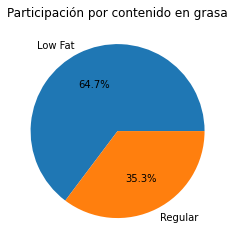

In [34]:
cuenta = dt1["Item_Fat_Content"].value_counts()

plt.pie(cuenta, labels=cuenta.index, autopct="%1.1f%%")
plt.title("Participación por contenido en grasa")

* Se puede apreciar que la composisición del portafolio de prodcutos, se distribuye en productos bajos en grasa con una participación del 64.7% y con contenido de grasa regular con el 35.3%.

# Histograma del precio máxmio de venta al público

Text(0, 0.5, 'Cuenta')

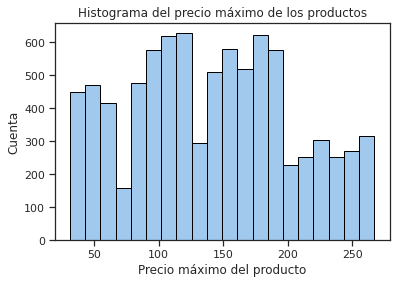

In [35]:
import seaborn as sns
sns.set()
sns.set_style("white")
sns.set(style = "ticks")
sns.set_color_codes()
dt1["Item_MRP"].hist(bins=20, edgecolor = "black", color = "#a1c9ed")
plt.ticklabel_format(useOffset=False, style="plain")
plt.grid(False)
plt.title("Histograma del precio máximo de los productos")
plt.xlabel("Precio máximo del producto")
plt.ylabel("Cuenta")

## Coeficiente de asimetría

In [36]:
sk_2 = dt1["Item_MRP"].skew()
sk_2
print(f"El coeficiente de asimetría nos indica los datos tienen un ligero sesgo hacia la derecha, ya que el valor del coeficiente fue de {round(sk_2,2)}, si el coeficiente de asimetría fuera igual\na cero (0), los datos seguirian una distribución normal, en este caso los datos tiene un ligero sesgo hacia la derecha.")


El coeficiente de asimetría nos indica los datos tienen un ligero sesgo hacia la derecha, ya que el valor del coeficiente fue de 0.13, si el coeficiente de asimetría fuera igual
a cero (0), los datos seguirian una distribución normal, en este caso los datos tiene un ligero sesgo hacia la derecha.


## Coeficiente de Curtosis

In [37]:
# Kurtosis

k_1 = dt1["Item_MRP"].kurtosis()
k_1

print(f"La Kurtosis nos indica la forma de la distribución, ya que el valor del coeficiente de Kurtosis fue de {round(k_1,2)}, si el coeficiente de Kurtosis fuera igual\na tres (3), los datos seguirian una distribución normal, en este caso los datos tiene una forma de curva aplanada.")


La Kurtosis nos indica la forma de la distribución, ya que el valor del coeficiente de Kurtosis fue de -0.89, si el coeficiente de Kurtosis fuera igual
a tres (3), los datos seguirian una distribución normal, en este caso los datos tiene una forma de curva aplanada.


# Histograma del peso de los productos

Text(0, 0.5, 'Cuenta')

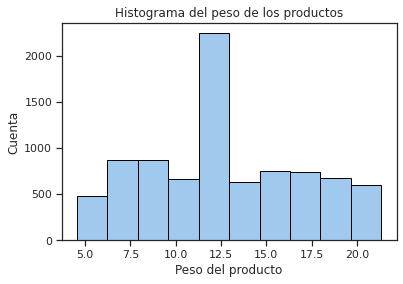

In [38]:
import seaborn as sns
sns.set()
sns.set_style("white")
sns.set(style = "ticks")
sns.set_color_codes()
dt1["Item_Weight"].hist(bins=10, edgecolor = "black", color = "#a1c9ed")
plt.ticklabel_format(useOffset=False, style="plain")
plt.grid(False)
plt.title("Histograma del peso de los productos")
plt.xlabel("Peso del producto")
plt.ylabel("Cuenta")

# Coeficiente de asimetría

In [39]:
sk_2 = dt1["Item_Weight"].skew()
sk_2
print(f"El coeficiente de asimetría nos indica los datos tienen un ligero sesgo hacia la derecha, ya que el valor del coeficiente fue de {round(sk_2,2)}, si el coeficiente de asimetría fuera igual\na cero (0), los datos seguirian una distribución normal, en este caso los datos tiene un ligero sesgo hacia la derecha.")


El coeficiente de asimetría nos indica los datos tienen un ligero sesgo hacia la derecha, ya que el valor del coeficiente fue de 0.12, si el coeficiente de asimetría fuera igual
a cero (0), los datos seguirian una distribución normal, en este caso los datos tiene un ligero sesgo hacia la derecha.


# Coeficiente de Curtosis

In [40]:
# Kurtosis

k_1 = dt1["Item_Weight"].kurtosis()
k_1

print(f"La Kurtosis nos indica la forma de la distribución, ya que el valor del coeficiente de Kurtosis fue de {round(k_1,2)}, si el coeficiente de Kurtosis fuera igual\na tres (3), los datos seguirian una distribución normal, en este caso los datos tiene una forma de curva aplanada.")


La Kurtosis nos indica la forma de la distribución, ya que el valor del coeficiente de Kurtosis fue de -0.86, si el coeficiente de Kurtosis fuera igual
a tres (3), los datos seguirian una distribución normal, en este caso los datos tiene una forma de curva aplanada.


# Histograma de las ventas del Item

Text(0, 0.5, 'Cuenta')

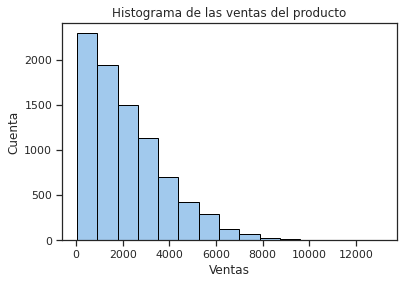

In [41]:
import seaborn as sns
sns.set()
sns.set_style("white")
sns.set(style = "ticks")
sns.set_color_codes()
dt1["Item_Outlet_Sales"].hist(bins=15, edgecolor = "black", color = "#a1c9ed")
plt.ticklabel_format(useOffset=False, style="plain")
plt.grid(False)
plt.title("Histograma de las ventas del producto")
plt.xlabel("Ventas")
plt.ylabel("Cuenta")


# Coeficiente de asimetría

In [42]:
sk_2 = dt1["Item_Outlet_Sales"].skew()
sk_2
print(f"El coeficiente de asimetría nos indica los datos tienen un ligero sesgo hacia la derecha, ya que el valor del coeficiente fue de {round(sk_2,2)}, si el coeficiente de asimetría fuera igual\na cero (0), los datos seguirian una distribución normal, en este caso los datos tiene un ligero sesgo hacia la derecha.")


El coeficiente de asimetría nos indica los datos tienen un ligero sesgo hacia la derecha, ya que el valor del coeficiente fue de 1.18, si el coeficiente de asimetría fuera igual
a cero (0), los datos seguirian una distribución normal, en este caso los datos tiene un ligero sesgo hacia la derecha.


# Coeficiente de Curtosis

In [43]:
# Kurtosis

k_1 = dt1["Item_Outlet_Sales"].kurtosis()
k_1

print(f"La Kurtosis nos indica la forma de la distribución, ya que el valor del coeficiente de Kurtosis fue de {round(k_1,2)}, si el coeficiente de Kurtosis fuera igual\na tres (3), los datos seguirian una distribución normal, en este caso los datos tiene una forma de curva aplanada.")


La Kurtosis nos indica la forma de la distribución, ya que el valor del coeficiente de Kurtosis fue de 1.62, si el coeficiente de Kurtosis fuera igual
a tres (3), los datos seguirian una distribución normal, en este caso los datos tiene una forma de curva aplanada.


# Análisis de cajas

## Análisis de las ventas del producto

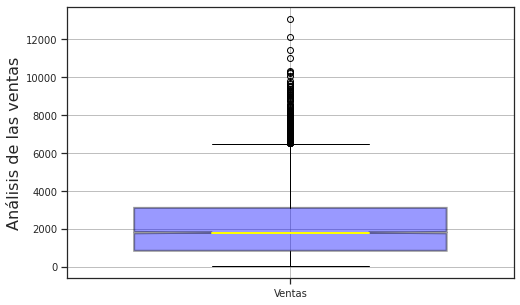

In [44]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8,5))
boxplots = axes.boxplot([dt1["Item_Outlet_Sales"]],
           notch = True,
           labels=["Ventas"],
           widths = .7,
           patch_artist=True,
           medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .4)
          );

plt.ylabel("Análisis de las ventas", fontsize = 16)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
axes.grid(color='#808080', linewidth=0.5)

* De acuerdo con la gráfica se que los datos tienen presencia de outliers  dentro de la base de datos, por lo que la utilización del promedio como media de tendencia central, no sería la más indicada por los outliers presente. Un indicador que sería de más utilidad sería la mediana.

## Análisis del peso del prodcuto

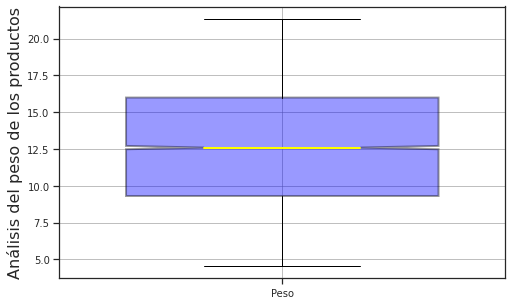

In [45]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8,5))
boxplots = axes.boxplot([dt1["Item_Weight"]],
           notch = True,
           labels=["Peso"],
           widths = .7,
           patch_artist=True,
           medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .4)
          );

plt.ylabel("Análisis del peso de los productos", fontsize = 16)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
axes.grid(color='#808080', linewidth=0.5)

* Se puede apreciar que la gráfica de cajas está bien distrinuída el promedio del peso de los productos, visualmente se observa cerca del 12.5. Los datos no presentan outliers.

# Análisis del precio máximo del producto

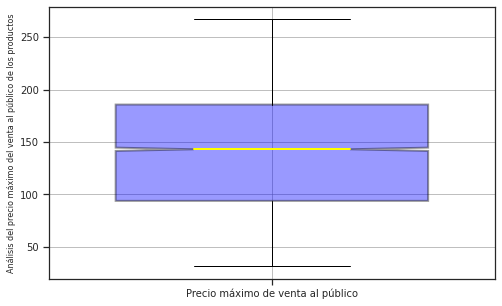

In [46]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8,5))
boxplots = axes.boxplot([dt1["Item_MRP"]],
           notch = True,
           labels=["Precio máximo de venta al público"],
           widths = .7,
           patch_artist=True,
           medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .4)
          );

plt.ylabel("Análisis del precio máximo del venta al público de los productos", fontsize = 8)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
axes.grid(color='#808080', linewidth=0.5)

*La gráfica de cajas nos confirma lo que visualmente se pudo apreciar en la gráfica del histograma, que no existen outliers dentro de la base, además no existe una amplia disperción en los precios máximos de venta al público, aunque para confirmar se deben realizar las pruebas estadísticas, como por ejemplo calcular el coeficiente de variación o la desviación estandar.


In [47]:
desv_est = np.std(dt1["Item_MRP"])
desv_est

print(f"Cómo se indicó anteriormente para saber si existe una amplia disperción se debe calcular la desviación estandar y el coeficeinte de variación; para el presente caso\nla desviación estandar fue de {round(desv_est,2)}, lo que nos indica que existe una amplia variabilidad en los datos con relación a la media.")

Cómo se indicó anteriormente para saber si existe una amplia disperción se debe calcular la desviación estandar y el coeficeinte de variación; para el presente caso
la desviación estandar fue de 62.27, lo que nos indica que existe una amplia variabilidad en los datos con relación a la media.


In [48]:
coef_var = desv_est / np.mean(dt1["Item_MRP"]) * 100

coef_var

print(f"Cómo se indicó anteriormente para saber si existe una amplia disperción se debe calcular la desviación estandar y el coeficeinte de variación; para el presente caso\nel coeficiente de variación fue de {round(coef_var,2)}, lo que nos indica que existe una amplia disperción en los datos con relación a la media.")

Cómo se indicó anteriormente para saber si existe una amplia disperción se debe calcular la desviación estandar y el coeficeinte de variación; para el presente caso
el coeficiente de variación fue de 44.17, lo que nos indica que existe una amplia disperción en los datos con relación a la media.


# Mapa de calor de la correlación

<Axes: >

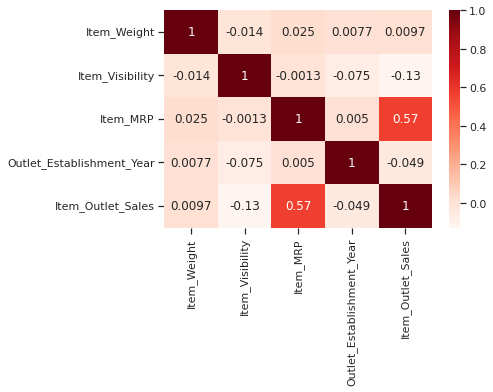

In [49]:
corr = dt1.corr()

corr

sns.heatmap(corr, cmap = "Reds", annot=True)

* El mapa de calor de la correlación, nos indica que existe una correlación positiva moderada entre el precio máximo de venta el público y las ventas.

In [50]:
dt1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [51]:
p_1 = dt1["Item_Identifier"].unique().tolist()
len(p_1)

1559

In [52]:
p_1 = dt1.iloc[:,[0,4]]
p_1 = p_1.drop_duplicates()
len(p_1["Item_Identifier"])

1559

# Producto con mayor nivel de ventas entre las tiendas

 A continuación, se presenta los 5 productos con mayor nivel de ventas:

In [53]:
p_1 = dt1.groupby(["Item_Identifier"])["Item_Outlet_Sales"].sum()
p_2 = pd.DataFrame(p_1.sort_values(ascending=False))
p_2["Part(%)"] = p_2.iloc[:,[0]]/p_2.iloc[:,[0]].sum()*100
p_3 = p_2.head()
p_3 = p_3.reset_index(drop=False)
g_1 = p_3["Part(%)"].sum()
p_3["Item_Outlet_Sales"] = p_3["Item_Outlet_Sales"].apply(lambda x: "{:,.2f}".format(x))
print(f"{p_3}\n\nEntre estos 5 productos se concentra el {round(g_1,2)}% del total de las ventas.")

  Item_Identifier Item_Outlet_Sales   Part(%)
0           FDY55         42,661.80  0.229474
1           FDA15         41,584.54  0.223680
2           FDZ20         40,185.02  0.216152
3           FDF05         36,555.75  0.196630
4           FDA04         35,741.48  0.192250

Entre estos 5 productos se concentra el 1.06% del total de las ventas.


El tipo de Item que más se vende entre las tiendas.

In [54]:
p_1 = dt1.groupby(["Item_Type"])["Item_Outlet_Sales"].sum()
p_2 = pd.DataFrame(p_1.sort_values(ascending=False))
p_2["Part(%)"] = p_2.iloc[:,[0]]/p_2.iloc[:,[0]].sum()*100
p_3 = p_2.head()
p_3 = p_3.reset_index(drop=False)
g_1 = p_3["Part(%)"].sum()
p_3["Item_Outlet_Sales"] = p_3["Item_Outlet_Sales"].apply(lambda x: "{:,.2f}".format(x))
print(f"{p_3}\n\nEntre estos 5 tipos de productos se concentra el {round(g_1,2)}% del total de las ventas.")

               Item_Type Item_Outlet_Sales    Part(%)
0  Fruits and Vegetables      2,820,059.82  15.168849
1            Snack Foods      2,732,786.09  14.699412
2              Household      2,055,493.71  11.056317
3           Frozen Foods      1,825,734.79   9.820464
4                  Dairy      1,522,594.05   8.189897

Entre estos 5 tipos de productos se concentra el 58.93% del total de las ventas.


# Nivel de ventas por tipo de productos

Text(0.5, 1.0, 'Participación por nivel de ventas')

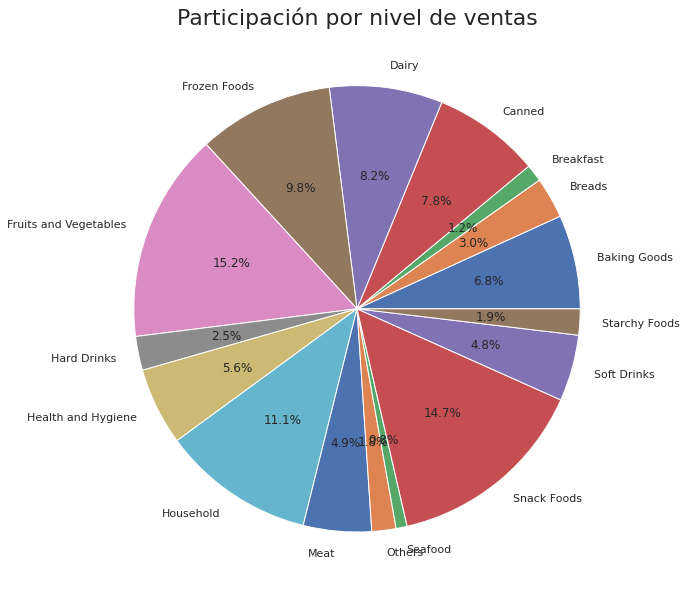

In [55]:
p_1 = dt1.groupby(["Item_Type"])["Item_Outlet_Sales"].sum()
fig, ax = plt.subplots(figsize=(10, 12))  
ax.pie(p_1, labels=p_1.index, autopct="%1.1f%%", labeldistance= 1.1)
ax.set_title("Participación por nivel de ventas", fontsize = 22)

In [56]:
print(f"En relación con el tipo de productos con mayor participación en ventas encontramos a {p_3.iloc[0,0]} con una participación del {round(p_3.iloc[0,2],2)}%, seguido de {p_3.iloc[1,0]} con una participación del {round(p_3.iloc[1,2],2)}%\ny el tercer iten más vendido es {p_3.iloc[2,0]} con una participación del {round(p_3.iloc[2,2],2)}%.")

En relación con el tipo de productos con mayor participación en ventas encontramos a Fruits and Vegetables con una participación del 15.17%, seguido de Snack Foods con una participación del 14.7%
y el tercer iten más vendido es Household con una participación del 11.06%.


# Participación en ventas por contenido en grasa del producto.

Text(0.5, 1.0, 'Participación por nivel de ventas')

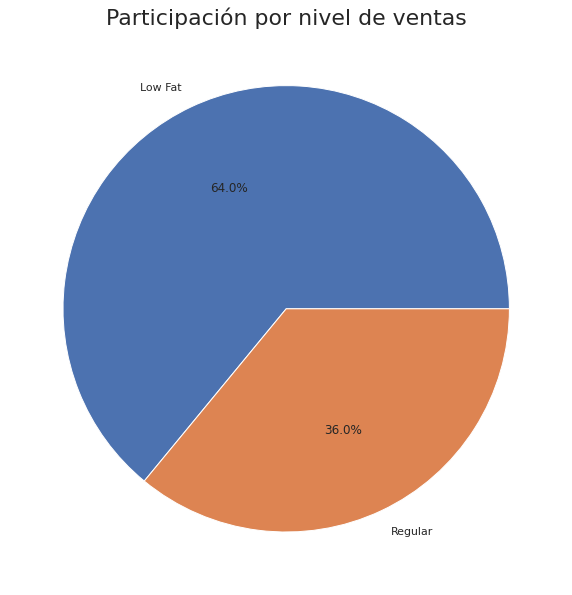

In [57]:
p_1 = dt1.groupby(["Item_Fat_Content"])["Item_Outlet_Sales"].sum()
fig, ax = plt.subplots(figsize=(10, 12))  
ax.pie(p_1, labels=p_1.index, autopct="%1.1f%%", labeldistance= 1.1)
ax.set_title("Participación por nivel de ventas", fontsize = 22)

El gráfico anterior se desprende que del total de las ventas de los establecimientos el 64% se concentra en los productos bajos en grasa y el 36% restante en los productos regulares.

# Análisis del tipo de tiendas

## Número de tiendas por el tamaño

Text(0.5, 1.0, 'Participación por nivel de ventas')

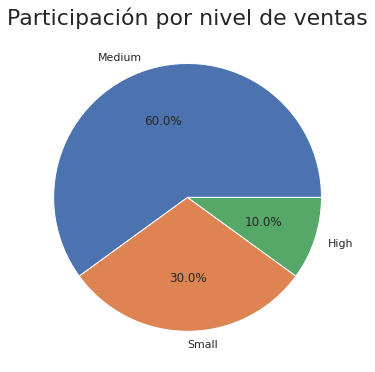

In [58]:
cuenta = dt1[["Outlet_Identifier","Outlet_Size"]].drop_duplicates()
cuenta = cuenta["Outlet_Size"].value_counts()

fig, ax = plt.subplots(figsize=(6, 8))  
ax.pie(cuenta, labels=cuenta.index, autopct="%1.1f%%", labeldistance= 1.1)
ax.set_title("Participación por nivel de ventas", fontsize = 22)


De la gráfica de participación del número de tiendas por tamaño, el 60% de las mismas son de tamaño mediano y el 30% son pequeñas.

# Tienda por nivel de facturación

In [59]:
p_1 = dt1.groupby(["Outlet_Identifier","Outlet_Size"])["Item_Outlet_Sales"].sum()
p_2 = pd.DataFrame(p_1.sort_values(ascending=False))
p_2["Part(%)"] = p_2.iloc[:,[0]]/p_2.iloc[:,[0]].sum()*100
p_3 = p_2.head()
p_3 = p_3.reset_index(drop=False)
g_1 = p_3["Part(%)"].sum()
p_3["Item_Outlet_Sales"] = p_3["Item_Outlet_Sales"].apply(lambda x: "{:,.2f}".format(x))
print(f"{p_3}\n\nEntre las 5 primeras tiendas dentro del ranking, estas concentra el {round(g_1,2)}% del total de las ventas. Es importante indicar que dentro del top 5 de ventas se encuentra una tienda de tamaño pequeño en segundo puesto.")

  Outlet_Identifier Outlet_Size Item_Outlet_Sales    Part(%)
0            OUT027      Medium      3,453,926.05  18.578359
1            OUT035       Small      2,268,122.94  12.200030
2            OUT049      Medium      2,183,969.81  11.747378
3            OUT017      Medium      2,167,465.29  11.658602
4            OUT013        High      2,142,663.58  11.525196

Entre las 5 primeras tiendas dentro del ranking, estas concentra el 65.71% del total de las ventas. Es importante indicar que dentro del top 5 de ventas se encuentra una tienda de tamaño pequeño en segundo puesto.


# Gráfica de para el nivel de ventas por tienda

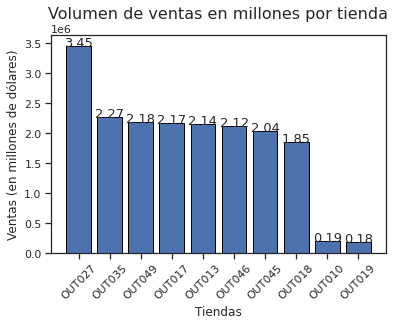

In [60]:
p_1 = dt1.groupby(["Outlet_Identifier"])["Item_Outlet_Sales"].sum()
p_2 = pd.DataFrame(p_1.sort_values(ascending=False))
p_2 = p_2.reset_index(drop=False)
p_2

tienda = np.array(p_2["Outlet_Identifier"])
ventas = np.array(p_2["Item_Outlet_Sales"])

plt.bar(tienda, ventas, edgecolor = "black")
plt.title("Volumen de ventas en millones por tienda", fontsize=16)
plt.xlabel('Tiendas')
plt.ylabel('Ventas (en millones de dólares)')
plt.xticks(rotation = 45)

for i, valor in enumerate(ventas):
    plt.text(i, valor+0.5, round(valor/1000000,2), ha='center', fontsize = 13)

# Tienda por portafolio del tipo de producto

In [61]:
p_1 = dt1.groupby(["Outlet_Identifier","Item_Type"])["Item_Outlet_Sales"].sum()
p_2 = pd.DataFrame(p_1.sort_values(ascending=False))
p_2 = p_2.reset_index(drop=False)
p_2

a_1 = p_2.groupby(["Outlet_Identifier"])["Item_Outlet_Sales"].sum()
a_1 = a_1.reset_index(drop=False)
a_1.rename(columns={
    
    "Item_Outlet_Sales":"Ventas_totales"
}, inplace=True)

p_3 = pd.merge(left=p_2, right=a_1, left_on="Outlet_Identifier", right_on="Outlet_Identifier") 
p_3["Part_por_produc"] = p_3["Item_Outlet_Sales"]/p_3["Ventas_totales"]*100
p_4 = p_3[p_3["Outlet_Identifier"]=="OUT027"]
p_4

,Outlet_Identifier,Item_Type,Item_Outlet_Sales,Ventas_totales,Part_por_produc
0,OUT027,Fruits and Vegetables,576028.1886,3.453926e+06,16.677490
1,OUT027,Snack Foods,513088.1172,3.453926e+06,14.855214
2,OUT027,Household,378299.5704,3.453926e+06,10.952741
3,OUT027,Frozen Foods,316272.3108,3.453926e+06,9.156893
4,OUT027,Canned,272150.4106,3.453926e+06,7.879451
5,OUT027,Dairy,262317.2104,3.453926e+06,7.594755
6,OUT027,Baking Goods,224172.1968,3.453926e+06,6.490359
7,OUT027,Meat,216288.4590,3.453926e+06,6.262105
8,OUT027,Health and Hygiene,199084.1870,3.453926e+06,5.763997
9,OUT027,Soft Drinks,147822.2476,3.453926e+06,4.279832


In [62]:
promedio = p_3.groupby(["Item_Type"])["Part_por_produc"].mean()
promedio = pd.DataFrame(promedio)
promedio = promedio.reset_index(drop=False)
promedio


,Item_Type,Part_por_produc
0,Baking Goods,6.827039
1,Breads,3.041375
2,Breakfast,1.394940
3,Canned,7.634327
4,Dairy,8.290544
5,Frozen Foods,9.710655
6,Fruits and Vegetables,14.719377
7,Hard Drinks,2.314677
8,Health and Hygiene,5.805652
9,Household,11.191497


In [63]:
x_list = ["Outlet_Identifier","Item_Type","Part_por_produc"]
f_1 = p_3.groupby("Outlet_Identifier")[x_list].head(5)
p_3_top5 = f_1.pivot(index="Item_Type", columns="Outlet_Identifier", values="Part_por_produc")
p_3_top5 = p_3_top5.sort_values(by=["Item_Type"], ascending=False)
p_3_top5 = p_3_top5.reset_index(drop=False)
p_3_top5
base = pd.merge(left=p_3_top5, right=promedio, left_on="Item_Type", right_on="Item_Type")

base

,Item_Type,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049,Part_por_produc
0,Snack Foods,13.774489,14.432789,14.351837,15.050821,14.276081,14.855214,15.677008,14.161876,12.972726,16.037039,14.558988
1,Household,13.565919,11.576547,10.266662,10.598594,10.104412,10.952741,11.897624,10.922259,10.362573,11.667636,11.191497
2,Fruits and Vegetables,13.033887,15.939356,14.740910,14.227695,13.386095,16.677490,13.431699,16.026433,14.385952,15.344250,14.719377
3,Frozen Foods,9.526722,9.506712,11.042719,9.914502,NaN,9.156893,9.412516,8.691414,11.482122,9.884736,9.710655
4,Dairy,8.127532,9.159372,8.579389,8.215183,8.984334,NaN,NaN,NaN,8.265035,8.227256,8.290544
5,Canned,NaN,NaN,NaN,NaN,9.315578,7.879451,8.617005,8.558236,NaN,NaN,7.634327


In [64]:
print(f"{base}\n\nSe puede observar que de todas las tiendas los tipos de productos más vendidos son los {base.iloc[0,0]} con una partición promedio en ventas del {round(base.iloc[0,11],2)}% dentro de las tiendas.")

               Item_Type     OUT010     OUT013     OUT017     OUT018  \
0            Snack Foods  13.774489  14.432789  14.351837  15.050821   
1              Household  13.565919  11.576547  10.266662  10.598594   
2  Fruits and Vegetables  13.033887  15.939356  14.740910  14.227695   
3           Frozen Foods   9.526722   9.506712  11.042719   9.914502   
4                  Dairy   8.127532   9.159372   8.579389   8.215183   
5                 Canned        NaN        NaN        NaN        NaN   

      OUT019     OUT027     OUT035     OUT045     OUT046     OUT049  \
0  14.276081  14.855214  15.677008  14.161876  12.972726  16.037039   
1  10.104412  10.952741  11.897624  10.922259  10.362573  11.667636   
2  13.386095  16.677490  13.431699  16.026433  14.385952  15.344250   
3        NaN   9.156893   9.412516   8.691414  11.482122   9.884736   
4   8.984334        NaN        NaN        NaN   8.265035   8.227256   
5   9.315578   7.879451   8.617005   8.558236        NaN        NaN  

Se puede observar que de todas las tiendas los tipos de productos más vendidos son los "Snack Foods"

# Preparamiento de la base para ML

In [65]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')

In [66]:
# Identificación de la variable dependiente y varaibles explicativas

y = dt1["Item_Outlet_Sales"]

X = dt1.drop(columns="Item_Outlet_Sales", axis =1)

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42, train_size= 0.75)

In [67]:
print(X_train.shape)
print(X_test.shape)

(6392, 11)
(2131, 11)


# Crear un pipeline para el pre procesamiento

In [68]:
dt1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [69]:
# Primero configuramos los seleccionadores

cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

Dado que mi base de datos ya ha sido tratada en el sentido de imputar datos vacíos, eliminación de datos duplicados, en esta fase del preprocesamiento se trabajará con la estadarización de variables numéricas y One hot encoder para las variables categoricas.

In [70]:
# Scaler
scaler = StandardScaler()
# One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [71]:
# Diagramas para explicar los pasos para la transformación e imputación de datos

# Pipeline para datos numericos
numeric_pipe = make_pipeline(scaler)
numeric_pipe

Pipeline(steps=[('standardscaler', StandardScaler())])

In [72]:
# Pipeline para datos categorios
categorical_pipe = make_pipeline(ohe)
categorical_pipe

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [73]:
# Tuples para Column Transformer

number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)

# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f41c67e18b0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f41c67e1730>)])

In [74]:
# Para transformar los datos

# fit on train
preprocessor.fit(X_train)

# transform train and test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [75]:
print(X_train_processed.shape)
print(X_test_processed.shape)

(6392, 1592)
(2131, 1592)


# Inspección de los resultados.

In [76]:
# Para revisar los resultados.
print(f"El número de datos faltantes en la base entrenamiento es de: {np.isnan(X_train_processed).sum().sum()}.")
print(f"El número de datos faltantes en la base de prueba de prueba es de: {np.isnan(X_test_processed).sum().sum()}.")
print('\n')
print(f"El tipo de dato que conforma la base entrenamiento son de tipo: {X_train_processed.dtype} ")
print(f"El tipo de dato que conforma la base de prueba son de tipo: {X_test_processed.dtype}")
print('\n')
print("La dimensión de la base de datos de entrenamiento es de", X_train_processed.shape )
print("La dimensión de la base de datos de prueba es de", X_test_processed.shape )
print('\n', "Base de entrenamiento", '\n')

print(X_train_processed)
print('\n', "Base de prueba", '\n')
print(X_test_processed)

El número de datos faltantes en la base entrenamiento es de: 0.
El número de datos faltantes en la base de prueba de prueba es de: 0.


El tipo de dato que conforma la base entrenamiento son de tipo: float64 
El tipo de dato que conforma la base de prueba son de tipo: float64


La dimensión de la base de datos de entrenamiento es de (6392, 1592)
La dimensión de la base de datos de prueba es de (2131, 1592)

 Base de entrenamiento 

[[ 0.82944552 -0.71277507  1.82810922 ...  0.          1.
   0.        ]
 [ 0.5686337  -1.29105225  0.60336888 ...  0.          1.
   0.        ]
 [-0.11896108  1.81331864  0.24454056 ...  1.          0.
   0.        ]
 ...
 [ 1.12582258 -0.92052713  1.52302674 ...  1.          0.
   0.        ]
 [ 1.77785212 -0.2277552  -0.38377708 ...  1.          0.
   0.        ]
 [ 0.82944552 -0.95867683 -0.73836105 ...  1.          0.
   0.        ]]

 Base de prueba 

[[ 0.34338714 -0.77664625 -0.99881554 ...  1.          0.
   0.        ]
 [-1.16695037  0.1003166  -1

# Modelo de regresión lineal

In [77]:
# Importar el modelo
from sklearn.linear_model import LinearRegression

In [78]:
#from pandas.core.common import random_state
# Hacer la instancia del modelo -- llamar al modelo que se va a utilizar

reg = LinearRegression()

In [79]:
reg.fit(X_train_processed, y_train)

LinearRegression()

In [80]:
train_score = reg.score(X_train_processed,y_train)
test_score  = reg.score(X_test_processed,y_test)

print(f"El valor del R2 de los datos entrenamiento fue de: {round(train_score,3)} y el R2 de los datos de prueba fue de: {round(test_score,3)}.")


El valor del R2 de los datos entrenamiento fue de: 0.671 y el R2 de los datos de prueba fue de: -1.3642817215390851e+20.


Cómo se puede observar el R2 de los datos de prueba general un R2 negativo, esto nos lleva a interpretar que existe un mal modelamiento del mismo, por lo que se debe probar otro modelo, que incluya menos variables de esta forma poder observar si los datos seleccionados pueden explicar mejor la variabilidad de la dependiente.

In [81]:
X_test_processed

array([[ 0.34338714, -0.77664625, -0.99881554, ...,  1.        ,
         0.        ,  0.        ],
       [-1.16695037,  0.1003166 , -1.58519423, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.39080747, -0.48299432, -1.59578435, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-1.12664309,  1.21832428,  1.09397975, ...,  1.        ,
         0.        ,  0.        ],
       [-1.48466658, -0.77809567, -0.36679966, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.53306846, -0.77976293,  0.11221189, ...,  1.        ,
         0.        ,  0.        ]])

In [82]:
# Obtener los nombres de las características originales después de la transformación
# Código generado con la ayuda de ChatGPT
numeric_features = preprocessor.transformers_[0][2]
categorical_features = preprocessor.transformers_[1][2]
feature_names = list(numeric_features)
feature_names.extend(list(categorical_features))
ohe_feature_names = preprocessor.named_transformers_['pipeline-2'].named_steps['onehotencoder'].get_feature_names_out(list(X_train.select_dtypes(include=['object']).columns))
feature_names = list(X_train.select_dtypes(include=['number']).columns)
feature_names.extend(list(ohe_feature_names))
X_train_processed_df = pd.DataFrame(X_train_processed, columns=feature_names)
X_train_processed_df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.829446,-0.712775,1.828109,1.327849,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.568634,-1.291052,0.603369,1.327849,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-0.118961,1.813319,0.244541,0.136187,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-1.156281,-1.004931,-0.952591,0.732018,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1.540750,-0.965484,-0.336460,0.493686,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [83]:
# Obtener los nombres de las características originales después de la transformación
# Código generado con la ayuda de ChatGPT
numeric_features = preprocessor.transformers_[0][2]
categorical_features = preprocessor.transformers_[1][2]
feature_names = list(numeric_features)
feature_names.extend(list(categorical_features))
ohe_feature_names = preprocessor.named_transformers_['pipeline-2'].named_steps['onehotencoder'].get_feature_names_out(list(X_test.select_dtypes(include=['object']).columns))
feature_names = list(X_test.select_dtypes(include=['number']).columns)
feature_names.extend(list(ohe_feature_names))
X_test_processed_df = pd.DataFrame(X_test_processed, columns=feature_names)

In [84]:
X_train_processed_df_select = X_train_processed_df[["Item_Weight","Item_Visibility","Item_MRP","Item_Identifier_DRF36","Item_Identifier_DRG25","Item_Identifier_FDA15","Item_Identifier_DRM37","Item_Identifier_FDA34","Item_Identifier_DRK23","Item_Identifier_DRG13"]] 

In [85]:
print(X_train_processed_df_select.shape)

(6392, 10)


In [86]:
X_test_processed_df_select = X_test_processed_df[["Item_Weight","Item_Visibility","Item_MRP","Item_Identifier_DRF36","Item_Identifier_DRG25","Item_Identifier_FDA15","Item_Identifier_DRM37","Item_Identifier_FDA34","Item_Identifier_DRK23","Item_Identifier_DRG13"]] 

In [87]:
print(X_test_processed_df_select.shape)

(2131, 10)


In [88]:
reg.fit(X_train_processed_df_select, y_train)

LinearRegression()

In [89]:
train_score_select = reg.score(X_train_processed_df_select,y_train)
test_score_select  = reg.score(X_test_processed_df_select,y_test)

print(f"El valor del R2 de los datos entrenamiento fue de: {round(train_score_select,3)} y el R2 de los datos de prueba fue de: {round(test_score_select,3)}.")

El valor del R2 de los datos entrenamiento fue de: 0.34 y el R2 de los datos de prueba fue de: 0.338.


In [90]:
print(f"Como se puede observar en el modelo anterior que incluía todas las variables generaba un R2 de {round(train_score,2)} que era un valor aceptable, pero al aplicar el modelo a los datos de prueba generaba un R2 de {round(test_score,2)}\n que como se puede apreciar es un valor negativo pero al ajustar el modelo a solo un conjunto de variables se observa que aunque decrece el R2 de los datos de entrenamiento a {round(train_score_select,2)} el R2 de los datos de prueba mejora a {round(test_score_select,2)}\naunque el R2 sea muy bajo es un mejor modelo que el primero donde se incluía todas las varaibles.")

Como se puede observar en el modelo anterior que incluía todas las variables generaba un R2 de 0.67 que era un valor aceptable, pero al aplicar el modelo a los datos de prueba generaba un R2 de -1.3642817215390853e+20
 que como se puede apreciar es un valor negativo pero al ajustar el modelo a solo un conjunto de variables se observa que aunque decrece el R2 de los datos de entrenamiento a 0.34 el R2 de los datos de prueba mejora a 0.34
aunque el R2 sea muy bajo es un mejor modelo que el primero donde se incluía todas las varaibles.


# Para evaluar el modelo se lo hará con los datos del segundo modelo.

In [91]:
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [92]:
# Obtener las predicciones para evaluar el modelo

# Obtengan las predicciones del conjunto de entrenamiento
train_preds = reg.predict(X_train_processed_df_select)
# Obtengan las predicciones del conjunto de prueba
test_preds = reg.predict(X_test_processed_df_select)

# Raíz del error cuadrático medio RECM

In [93]:
rmse_train = np.sqrt(mean_squared_error(y_train, train_preds))
rmse_test = np.sqrt(mean_squared_error(y_test, test_preds))

print(f"El valor del RECM de los datos entrenamiento fue de: {round(rmse_train,3)} y el de los datos de prueba fue de: {round(rmse_test,3)}. Lo que nos indica que el error promedio de predicción del modelo es de {round(rmse_test,3)} dólares.")

El valor del RECM de los datos entrenamiento fue de: 1397.134 y el de los datos de prueba fue de: 1351.096. Lo que nos indica que el error promedio de predicción del modelo es de 1351.096 dólares.


# Modelo de árbol de regresión
Para generar el árbol de regresión se trabajará con toda la base procesada y no la seleccionada.

In [94]:
# LLamar al modelo
from matplotlib import pyplot as pyplot
from sklearn.tree import DecisionTreeRegressor
reg_tree = DecisionTreeRegressor(max_depth=2 ,random_state=42)

In [95]:
reg_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 2,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [96]:
reg_tree.fit(X_train_processed, y_train)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [97]:
# Predecir la variable objetivo de los datos de prueba y entrenamiento
train_preds = reg_tree.predict(X_train_processed)
test_preds = reg_tree.predict(X_test_processed)

In [98]:
train_score = reg_tree.score(X_train_processed, y_train)
test_score = reg_tree.score(X_test_processed, y_test)

print(f"El valor del R2 de entrenamiento fue de: {round(train_score,3)} y el R2 de los datos de prueba fue de: {round(test_score,3)} por lo que ambos resultados tienen\nuna diferencia de {round(round(train_score,3) - round(test_score,3),2)} que es bajita y a diferencia del primer modelo donde el R2 de los datos de prueba era negativo el árbol de regresión genera una mejor bondad de ajuste (R2).")

El valor del R2 de entrenamiento fue de: 0.432 y el R2 de los datos de prueba fue de: 0.434 por lo que ambos resultados tienen
una diferencia de -0.0 que es bajita y a diferencia del primer modelo donde el R2 de los datos de prueba era negativo el árbol de regresión genera una mejor bondad de ajuste (R2).


# Ajustar mejor el modelo

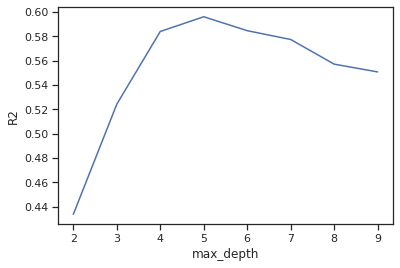

In [99]:
### Analizar con un valor entre 2 y 10
## Para este análisis se utilizará el código aprendido en la página.

# Lista de valores a probar para max_depth:
max_depth_range = list(range(2, 10))
# Lista para almacenar la puntuación para cada valor de max_depth:
r2 = []
for depth in max_depth_range:
    dec_tree = DecisionTreeRegressor(max_depth = depth, 
                             random_state = 42)
    dec_tree.fit(X_train_processed, y_train)
    score = dec_tree.score(X_test_processed, y_test)
    r2.append(score)

# Visualicen qué max_depth lleva a una puntuación R2 más alta
import matplotlib.pyplot as plt
plt.plot(max_depth_range, r2)
plt.xlabel('max_depth')
plt.ylabel('R2');

El modelo alcanza una mejor bondad de ajuste con un max_depth de 5, por lo que se ajustará el modelo.

In [100]:
reg_tree_2 = DecisionTreeRegressor(max_depth = 5, random_state = 42)
reg_tree_2.fit(X_train_processed, y_train)
train_5_score = reg_tree_2.score(X_train_processed, y_train)
test_5_score = reg_tree_2.score(X_test_processed, y_test)
print(f"Con el valor de 5 en el max_depth, se obtuvo un valor del R2 de entrenamiento fue de: {round(train_5_score,3)} y el R2 de los datos de prueba fue de: {round(test_5_score,3)} por lo que ambos resultados tienen\nuna diferencia de {round(round(train_5_score,3) - round(test_5_score,3),2)} mayor a la inicial de {round(round(train_score,3) - round(test_score,3),2)} pero se alcanzó un R2 más alto en los datos de prueba con una diferencia de:{round(round(test_5_score,3) - round(test_score,3),2)} .")

Con el valor de 5 en el max_depth, se obtuvo un valor del R2 de entrenamiento fue de: 0.604 y el R2 de los datos de prueba fue de: 0.596 por lo que ambos resultados tienen
una diferencia de 0.01 mayor a la inicial de -0.0 pero se alcanzó un R2 más alto en los datos de prueba con una diferencia de:0.16 .


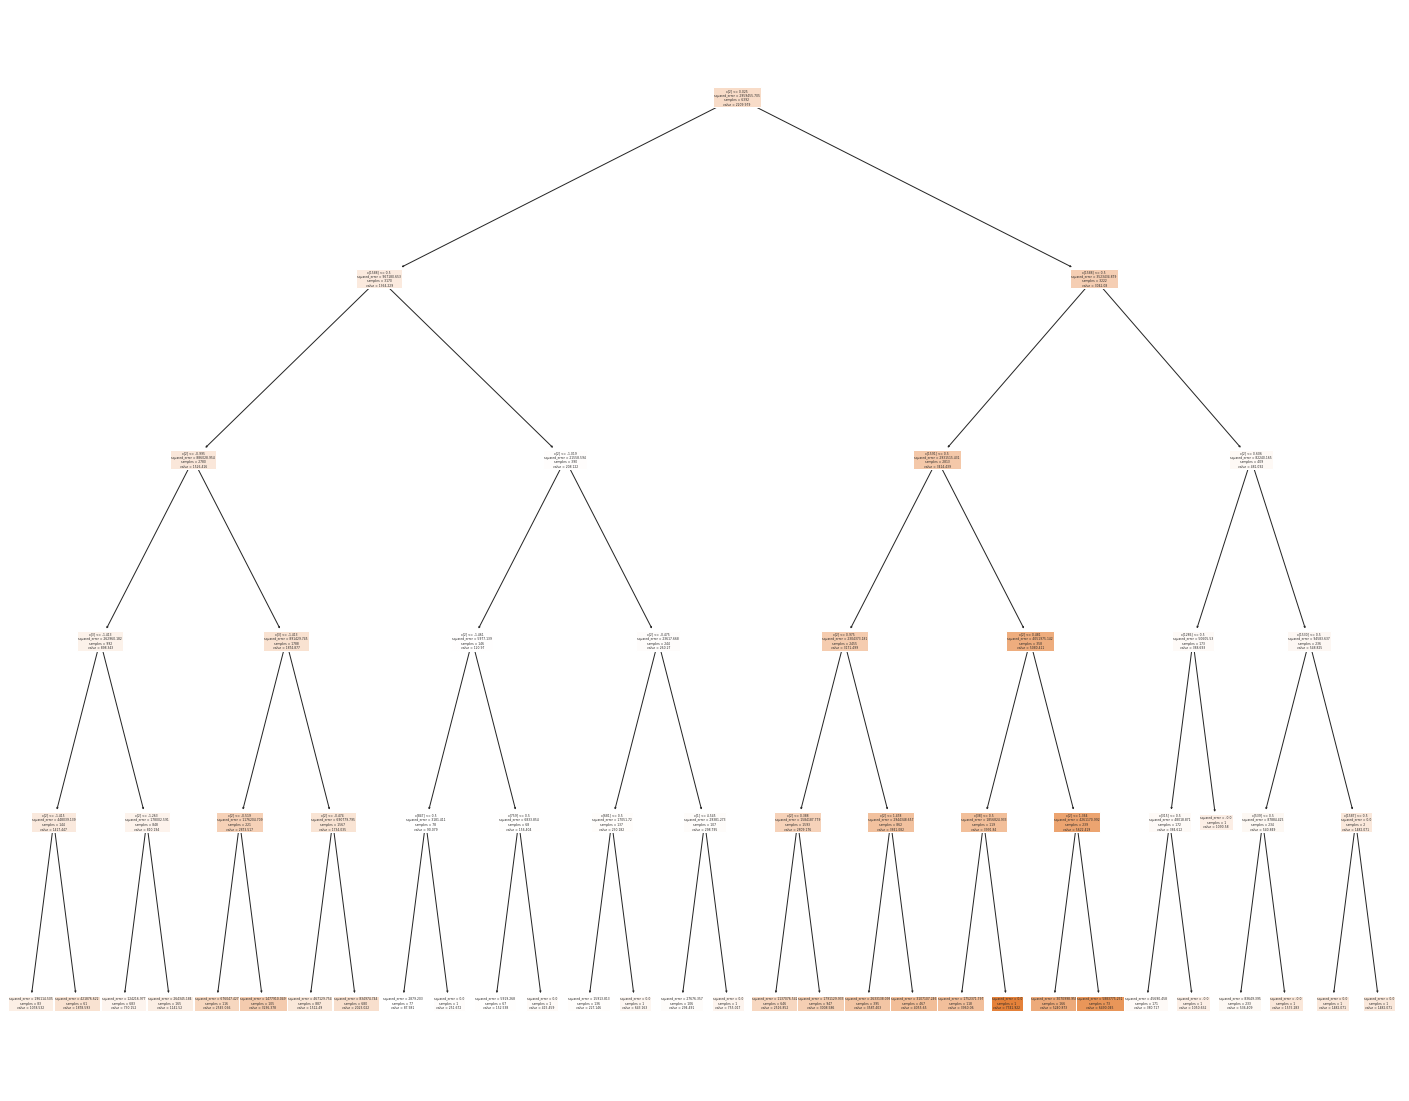

In [101]:
# Código obtenido de la clase 12
from matplotlib import pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(reg_tree_2, filled = True)


In [102]:
rmse_train = np.sqrt(mean_squared_error(y_train, train_preds))
rmse_test = np.sqrt(mean_squared_error(y_test, test_preds))

print(f"El valor del RECM de los datos entrenamiento fue de: {round(rmse_train,3)} y el de los datos de prueba fue de: {round(rmse_test,3)}. Lo que nos indica que el error promedio de predicción del modelo es de {round(rmse_test,3)} dólares.")

El valor del RECM de los datos entrenamiento fue de: 1296.932 y el de los datos de prueba fue de: 1249.878. Lo que nos indica que el error promedio de predicción del modelo es de 1249.878 dólares.


In [103]:
print(f"Finalmente, el mejor modelo que genera un RMCE más bajo es el árbol de regresión con un valor de {round(rmse_test,3)} dólares a diferencia del modelo de regresión que generó un RMCE de 1.351,09 dólares.")

Finalmente, el mejor modelo que genera un RMCE más bajo es el árbol de regresión con un valor de 1249.878 dólares a diferencia del modelo de regresión que generó un RMCE de 1.351,09 dólares.


# En general, ¿qué modelo recomiendan?

El modelo a utilizar el es de árboles de regresión, debido a la facilidad de generación del modelo, además de la facilidad de ajustar el modelo para obtener una mejor bondad de ajuste. Adicional, en términos técnicos el modelo de árboles de regresión obtiene una mejor métricas de evaluación como un R2 más alto y un RCME más bajo utilizando toda la informaciónde la base de datos.